# Chapter 12: Custom Models and Training with TensorFlow

- 3rd chapter of part 2 of the book HOML
- Dives deeper into the lower-level TF APIs

# Python APIs available in TensorFlow

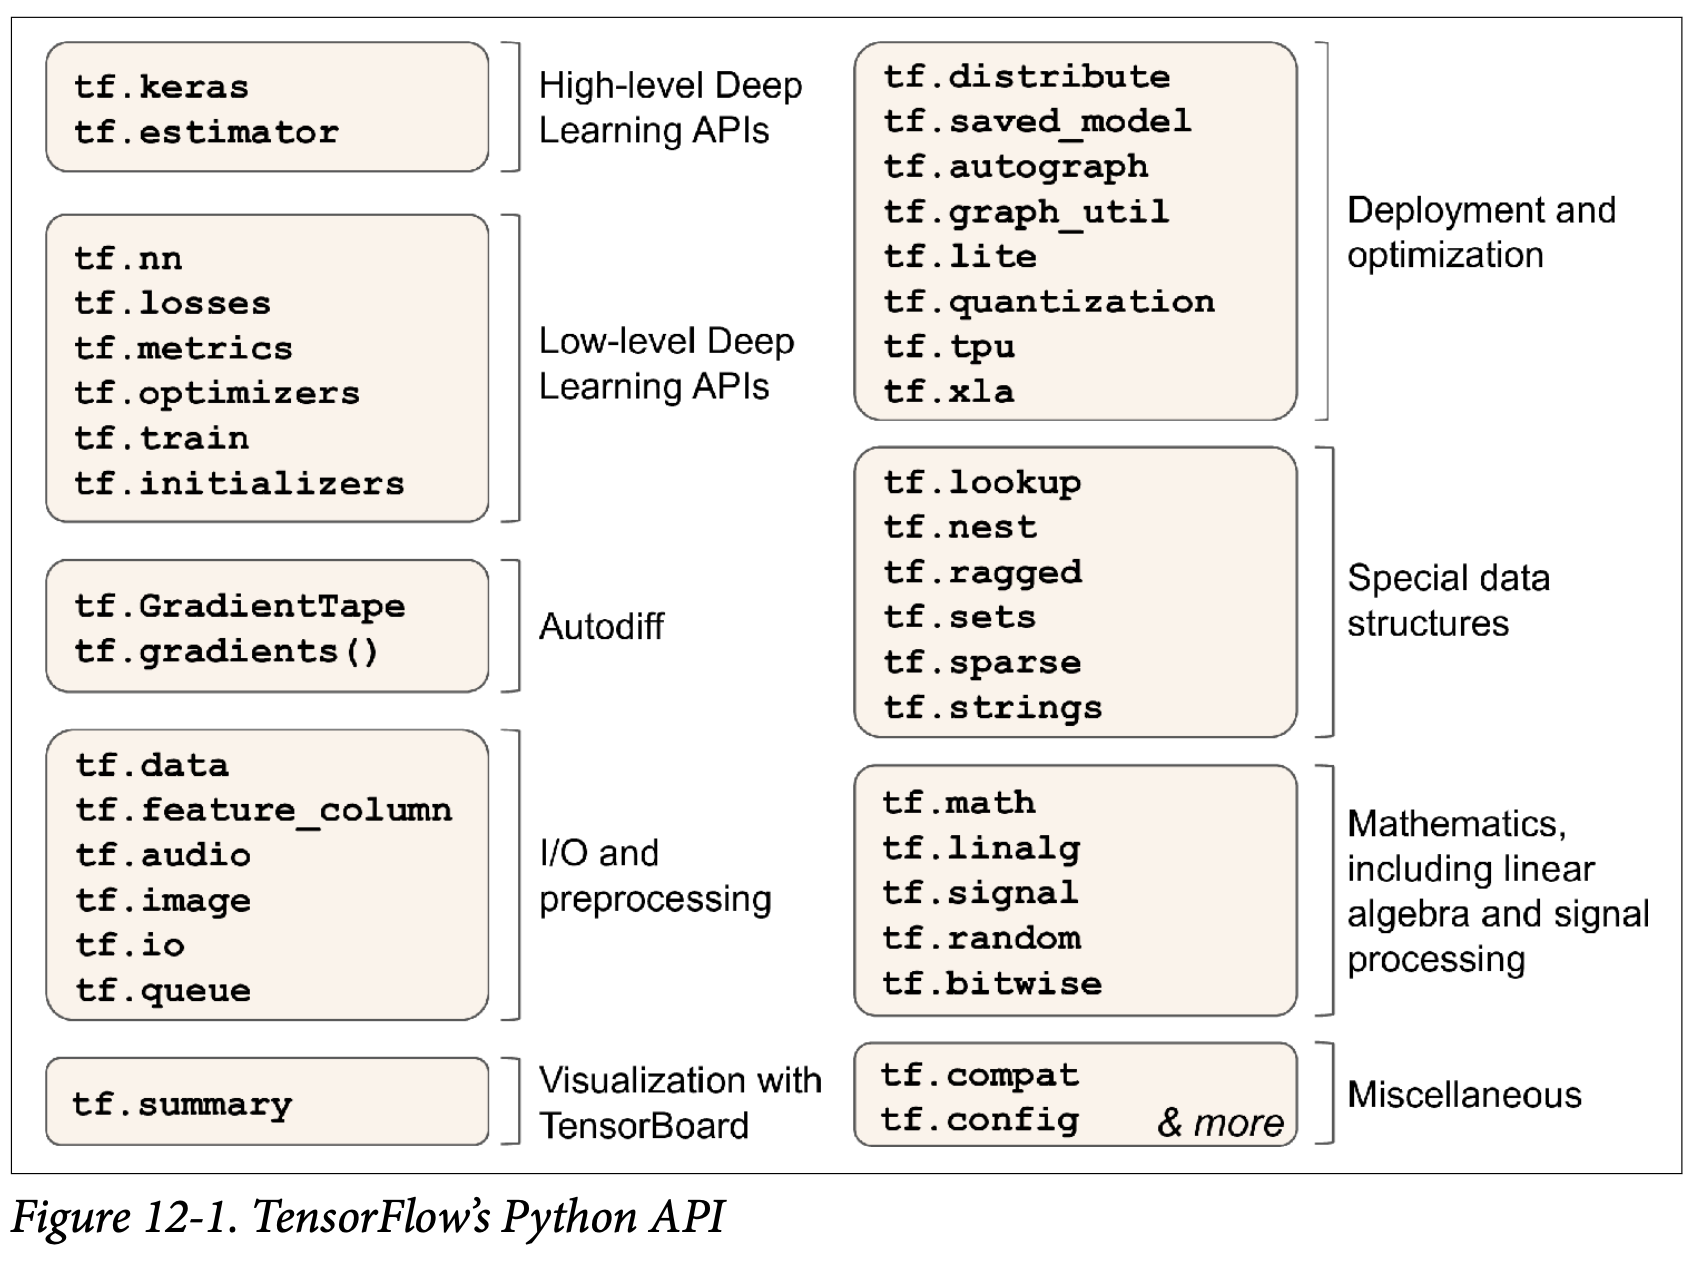

# TF Architecture


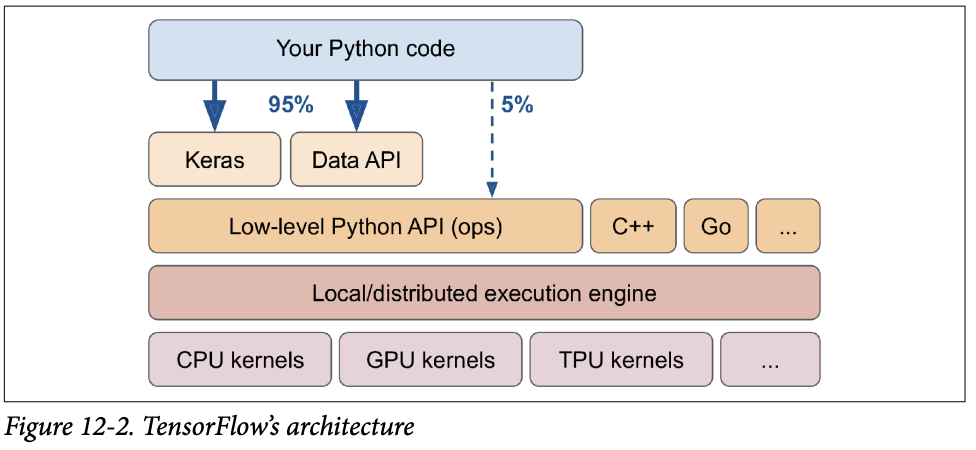

# Using TF like Numpy

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

## Tensors and Operations

- Tensors are multi-dimensional arrays with a uniform type (called a dtype) 
- You can see all supported dtypes at tf. dtypes.
- If you're familiar with NumPy, tensors are (kind of) like np. arrays
- All tensors are immutable like Python numbers and strings
    - you can never update the contents of a tensor, only create a new one.
    - There's an other way around updating the content. Known as tf.Variables


In [8]:
# Constant array
tf.constant([[1,2,3], [4,5,6]])

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [9]:
# Constant array - float
tf.constant([[1.,2,3], [4,5,6]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

- Default type is 32bits
    - For efficiency
    

In [11]:
# Constant float
tf.constant(42.)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [12]:
t = tf.constant([[1.,2,3], [4,5,6]])

In [13]:
# Shape
t.shape

TensorShape([2, 3])

In [30]:
# data type
t.dtype 

tf.float32

In [31]:
# slicing
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [25]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [26]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [32]:
# addition
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [33]:
# square
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [38]:
# matrix multiply
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [39]:
tf.matmul(t, tf.transpose(t))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [45]:
# Sum of all eliments of the array
tf.reduce_sum(t)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [48]:
# Product of all elements fo the array: Here, factorial of 7
tf.reduce_prod(t)

<tf.Tensor: shape=(), dtype=float32, numpy=720.0>

In [57]:
# Natural log
tf.math.log(tf.constant(np.e))

<tf.Tensor: shape=(), dtype=float32, numpy=0.99999994>

# TensorFlow and NumPy

- They work together pretty well
- Can interchange the functions and methods in one another

In [58]:
a = np.array([2,4,5])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([2, 4, 5])>

In [59]:
# Convert tensor constant to numpy array
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [60]:
# Using numpy array with TF operation

tf.square(a)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([ 4, 16, 25])>

In [62]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

## Point to note
- Numpy uses 64-bit precision
- TF uses 32-bit precision
    - Efficiency is the reason
    
> Don't forget to convert the type from NP to TF

In [66]:
a_tf = tf.constant(a, dtype="int32")

In [67]:
a_tf

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 4, 5], dtype=int32)>

In [68]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([2, 4, 5])>

## Type Conversion

- Not performed automatically, as opposed to the default behaviour of python
- Raises an exception
- Because type conversion can hurt the performance

> Cannot even add 32-bit and 64-bit types

In [69]:
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: 

In [70]:
tf.constant(2.) + tf.constant(40.)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [71]:
tf.constant(2.) + tf.constant(40., dtype="float64")

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: 

In [72]:
tf.constant(2) * tf.constant(40)

<tf.Tensor: shape=(), dtype=int32, numpy=80>

# Variables

- tf.Tensor values are immutable
- This means, cannot use tensors to initialize weights in NN
- Or even other parameters like the momentum vector

- **tf.Variable** to the rescue

In [73]:
v = tf.Variable([[1,2,3], [4,5,6]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

- Cannot simply mofify the elements

In [75]:
v[0,0] = 5

TypeError: 'ResourceVariable' object does not support item assignment

- Need to use **.assign()** method

In [77]:
v[0,0].assign(5)
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[5, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [78]:
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[10,  4,  6],
       [ 8, 10, 12]], dtype=int32)>

- **.scatter_nd_update() or .scatter_update()**
- Scatter updates into an existing tensor according to indices.



In [84]:
v.scatter_nd_update(indices=[[1,1]], updates=[100])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[ 10,   4,   6],
       [  8, 100,  12]], dtype=int32)>

- indices = list of list: list of indices
- updates = list of update values

# Other Data Structures in TF

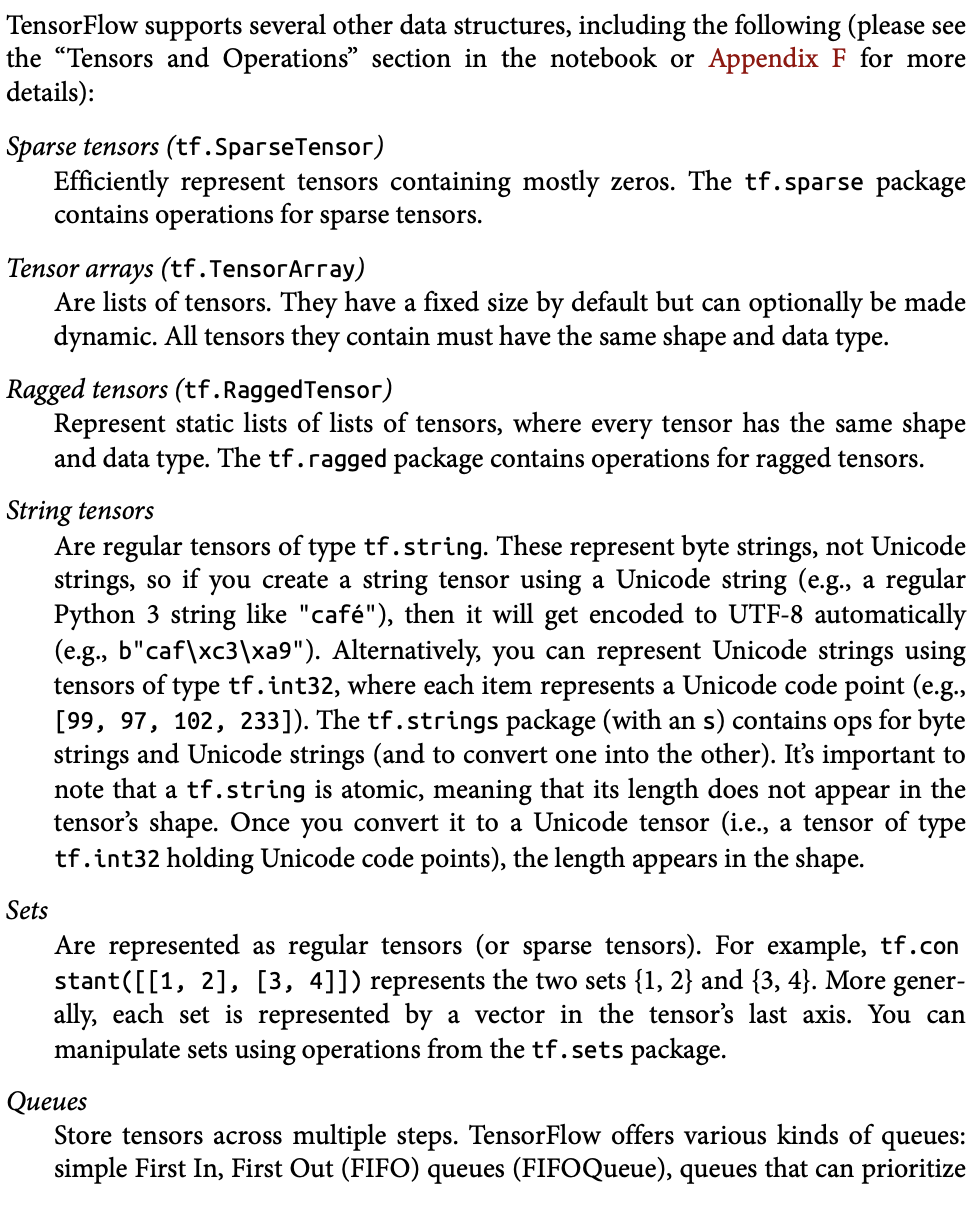
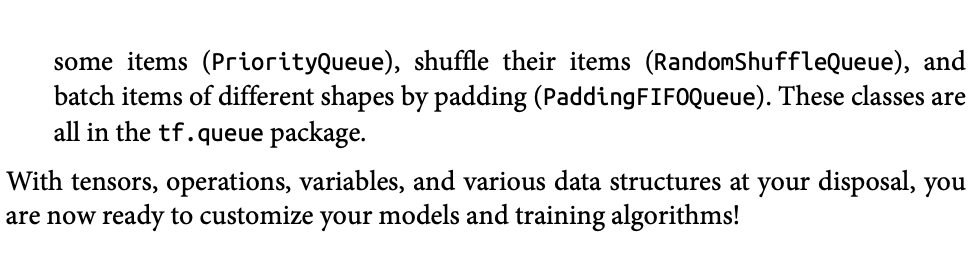

# Customizing Models and Training Algorithms

## Custom Loss Functions

In [86]:
# Just define the custom loss as follows:

def huber_fn(y_true, y_pred): # Take the parameters as input for the function
    error = y_true - y_pred # Calculate vector operations (preferred)
    is_small_error = tf.abs(error) < 1 # Condition for huber's loss
    squared_loss = tf.square(error)/2 # Squared loss calculated
    linear_loss = tf.abs(error) - 0.5 # Linear loss calculated
    return tf.where(is_small_error, squared_loss, linear_loss) # Return using an if-else statement

# Vectorized implementations benefit from TF's graph features
# Preferred to return a tensor containing one loss per instance rather than returning an aggregated value


Can use the loss function while compiling:
```python
model.compile(loss=huber_fn, optimizer='nadam')
```